In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from matplotlib.backends.backend_pdf import PdfPages 
np.seterr(all="ignore")
from astropy.io import fits
np.random.seed(12345)
import matplotlib
font = {'size' : 10}
matplotlib.rc('font',**font)
matplotlib.rc('grid',linewidth=1)
matplotlib.rc('xtick.major',width=2)
matplotlib.rc('xtick.major',size=7)
matplotlib.rc('xtick.minor',width=2)
matplotlib.rc('xtick.minor',size=4)
matplotlib.rc('ytick.major',width=2)
matplotlib.rc('ytick.major',size=7)
matplotlib.rc('ytick.minor',width=2)
matplotlib.rc('ytick.minor',size=4)
from numpy import mean
from numpy import std
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
import matplotlib.ticker
from matplotlib.ticker import FormatStrFormatter

In [2]:
#width evolution table
tp = Table.read('/home/soumya/work.dir/GRB/width_studies/GRB-Width-Project-Model/GRB220426A/width_evol.dat',
                format='ascii')
tm = tp['col1']
tm_nerr = tp['col1']-tp['col3']
tm_perr = tp['col4']-tp['col1']

wd = tp['col2']
wd_nerr = tp['col2']-tp['col5']
wd_perr = tp['col6']-tp['col2']

mean_wd = np.mean(wd)

In [3]:
tp

col1,col2,col3,col4,col5,col6
float64,float64,float64,float64,float64,float64
1.0601635,0.664040029,0.863053977,1.25727296,0.63306433,0.71606642
1.91677153,0.749695003,1.25727296,2.5762701,0.724614799,0.781493187
2.79233956,0.707557023,2.5762701,3.00840902,0.692179322,0.732409418
3.72355151,0.692798972,3.48171997,3.96538305,0.679530263,0.711387455
4.07387352,0.708054006,3.96538305,4.18236399,0.691809118,0.734677792
4.46773005,0.693050027,4.18236399,4.7530961,0.689243555,0.701159537
4.83637333,0.707503021,4.7530961,4.91965008,0.695145309,0.73036772
5.02554798,0.708070993,4.91965008,5.13144588,0.708070993,0.708070993
5.38935566,0.731380999,5.13144588,5.64726591,0.712539196,0.753310919


In [4]:
triggerName = 'bn220426285'
ra = 60.8542
dec =  -75.3783
det = 'n2'

p = '/home/soumya/work.dir/GRB/width_studies/Fermi_GRB/{0}/current/glg_tte_{1}_{0}_v00.fit'.format(triggerName,det)
pl = '/home/soumya/work.dir/GRB/width_studies/Fermi_GRB/{0}/plots'.format(triggerName)


In [5]:
############ INITIALIZATIONS
trig = 672648596.000
t90 = 6.0

binsize = 0.1
tmin = -50.0
tmax = t90+50.0

t_b = np.arange(tmin,tmax+0.01,binsize)
zero_pos = np.absolute(t_b-0).argmin()

counts = 0 
prebkg = zero_pos-int(20/binsize)
postbkg = len(t_b)-int(50/binsize)
bkgtime =  t_b[prebkg]-t_b[0]+t_b[len(t_b)-1]-t_b[postbkg]
tplot = (t_b[1:]+t_b[:-1])/2.0

############################# FERMI

t_data = Table.read(p,format='fits',hdu=2)
t_data['TIME'] = t_data['TIME']-trig
t = t_data[(t_data['PHA']>=3) & (t_data['PHA']<=124) & (t_data['TIME']>tmin) & (t_data['TIME']<tmax)]

a= np.histogram(t['TIME'],bins=t_b)
abkg_cnt = binsize*(np.sum(a[0][0:prebkg])+np.sum(a[0][postbkg:len(a[0])]))/bkgtime
counts = a[0]-abkg_cnt


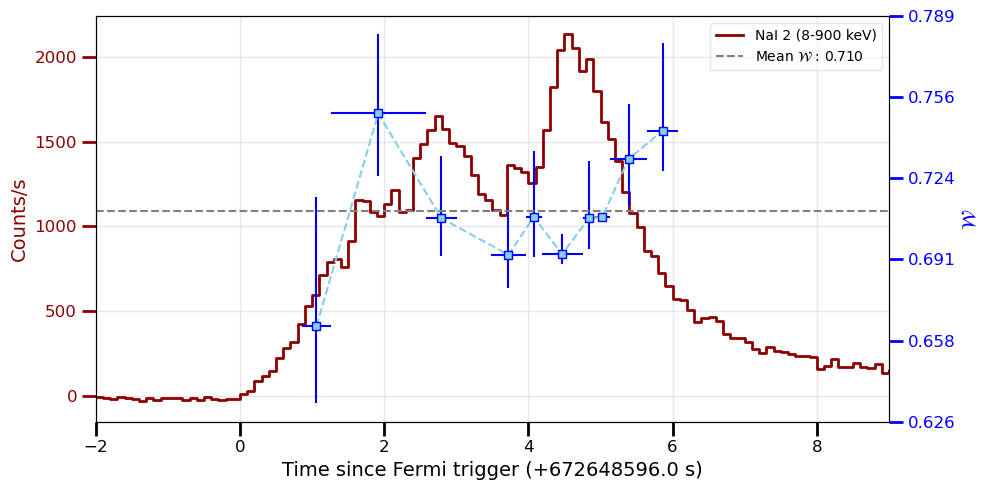

In [11]:
nticks = 6     
################################# PLOTS
fig1,ax1 = plt.subplots(figsize=(10,5))
ax1.grid(alpha=0.3)

ax1.step(tplot,counts,where='mid',label='NaI 2 (8-900 keV)',color='darkred',linewidth=2)
plt.xlim(-5,t90+5)
ax1.set_ylabel('Counts/s',fontsize=14,color='darkred')
plt.tick_params(axis='y',colors='darkred',size=10,labelsize=12)
#ax1.legend(fancybox=True, framealpha=0.5,loc=1,fontsize=10)
ax1.set_xlabel('Time since Fermi trigger (+672648596.0 s)',fontsize=14)
plt.tick_params(axis='x',size=10,labelsize=12)

ax = ax1.twinx()
ax.errorbar(tm,wd,[wd_nerr,wd_perr],[tm_nerr,tm_perr],ls='--',marker='s',c='skyblue',mec='blue',ecolor='blue')
ax.set_ylabel(r'$\mathcal{W}$',fontsize=14,color='blue')
plt.tick_params(axis='y',colors='blue',size=10,labelsize=12)
ax.axhline(mean_wd,ls ='--',color='grey',label=r'Mean $\mathcal{W}$'+' : {0:.3f}'.format(mean_wd))

ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.xlim(-2,t90+3)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, fancybox=True, framealpha=0.5,loc=1,fontsize=10)

plt.tight_layout()
plt.savefig('{0}/wd_evolution.pdf'.format(pl),format='pdf')
plt.savefig('{0}/wd_evolution.png'.format(pl),format='png')
plt.show()

##################################################################################

In [64]:
mean_wd

0.7104854047